# Analizando las 25 retailers más grandes de Estados Unidos

<img src=/work/retail-que-es.png>

Lo que realizaremos en éste proyecto es analizar las 25 compañías retail más exitosas en Estados Unidos. Veamos las generalidades de estos datos encontrados en el dataset escogido para el proyecto. 

### Importamos las librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importando nuestro Dataset

In [ ]:
df = pd.read_csv('/work/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


### Orden de las ventas de mayor a menor 

In [ ]:
retailers = df.sort_values('Sales', ascending=0)
retailers

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### Medidas de Tendencia de los Datos

In [ ]:
retailers.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


Observamos que el promedio total de ventas en la tabla es de USD 71.063 MM, valor que se aleja bastante de la mediana de los datos presentados, siendo esta segunda USD 34.980 MM.

Claramente tenemos un valor atípico que nos indica que una de las empresa tiene un número de ventas mayor, muy alejado del resto de los retailers.

### Visualizando los datos de la tabla anterior

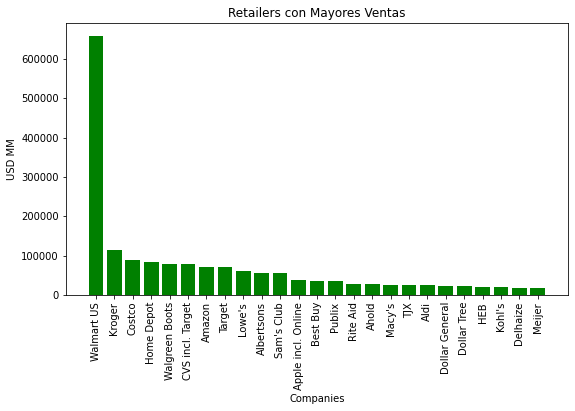

In [ ]:
x = retailers['Company']
y = retailers['Sales']
plt.figure(figsize=(9,5))
plt.bar(x,y, color='green')
plt.xticks(rotation=90)
plt.title('Retailers con Mayores Ventas')
plt.xlabel('Companies')
plt.ylabel('USD MM')
plt.show()

Está muy claro que la empresa que tiene mayores ventas y de manera destacada en comparación con sus competidoras es Walmart US. Sigamos Analizando.

## I. Preguntas del Negocio

### 1. ¿Cuál es el promedio de ventas sin contar con la compañía dominante?

In [ ]:
other_ret = retailers[retailers.Company != 'Walmart US']
mean_sales = other_ret['Sales'].mean()
mean_sales = mean_sales.round(2)
print(mean_sales)

46602.42


El promedio de ventas sin Walmart US es de USD 46602.42 MM

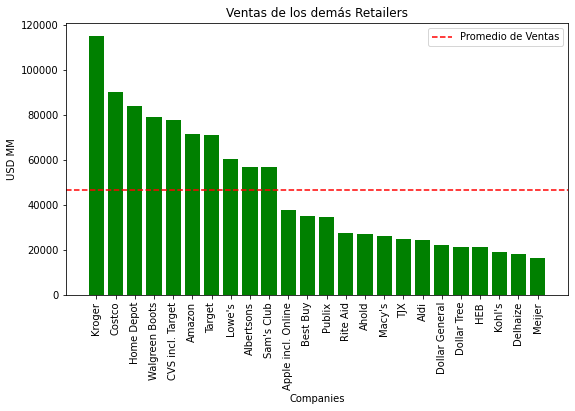

In [ ]:
# Si lo vemos gráficamente
fig, ax = plt.subplots(figsize=(9,5))
x = other_ret['Company']
y = other_ret['Sales']
plt.bar(x,y, color='green')
ax.axhline(mean_sales, label='Promedio de Ventas', ls='--', color='red')
plt.title('Ventas de los demás Retailers')
plt.xticks(rotation=90)
plt.xlabel('Companies')
plt.ylabel('USD MM')
plt.legend()
plt.show()

Podemos observar que sólo 10 empresas se encuentran por encima de ese promedio de ventas

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías

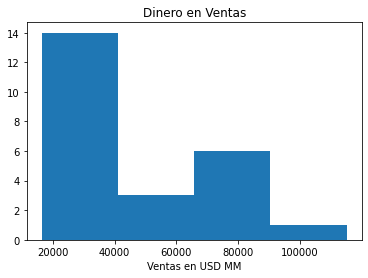

In [ ]:
plt.hist(other_ret['Sales'], bins=4)
plt.title('Dinero en Ventas')
plt.xlabel('Ventas en USD MM')
plt.show()


En éste histograma podemos observar fácilmente que la mayoría de las empresas (excluyendo a Walmart US) se encuentran en un rango de ventas entre USD 20.000 MM Y USD 40.000 MM. 

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

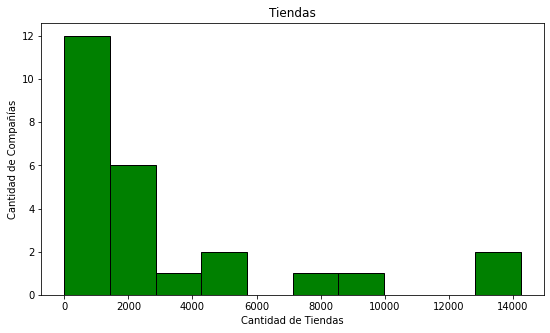

La máxima cantidad de tiendas es: 14250.0


In [ ]:
x = other_ret['Company']
y = other_ret['Stores']
fig, ax = plt.subplots(figsize=(9,5))
stores_co = retailers.groupby('Company')['Stores'].sum()

plt.title('Tiendas')
plt.xlabel('Cantidad de Tiendas')
plt.ylabel('Cantidad de Compañías')
plt.hist(stores_co, color='green', edgecolor='black')
plt.show()

max_stores = retailers['Stores'].max()
print('La máxima cantidad de tiendas es:', max_stores)


### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

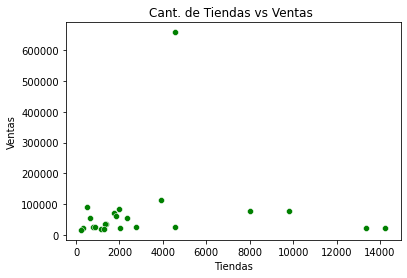

In [ ]:
sns.scatterplot(x=retailers.Stores, y=retailers.Sales, color='green')

plt.title('Cant. de Tiendas vs Ventas ')
plt.xlabel('Tiendas')
plt.ylabel('Ventas')
plt.show()

De manera rápida podemos observar, en la gráfica de dispersión, la casi nula correlatividad que existe entre éstas dos variables. no podemos concluir que el número de tiendas sea directamente proporcional al volumen de ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
max_sales = retailers['Sales'].max()
min_sales = retailers['Sales'].min()
print(max_sales)
print(min_sales)
print(max_sales - min_sales)

658119
16592
641527


Observamos que las ventas varian desde los USD 658119 MM. Esto signific un rango bastante amplio de USD 641527 MM.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

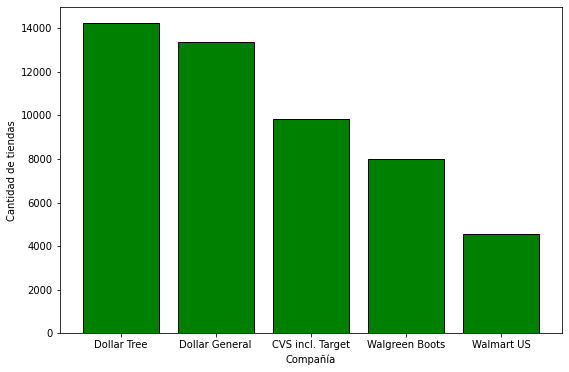

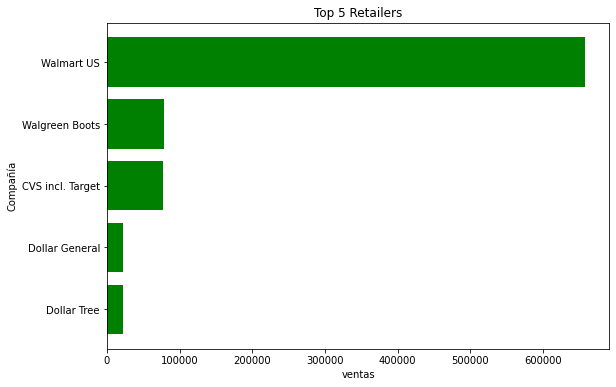

In [ ]:
stores_top5 = retailers.sort_values('Stores', ascending=0)
x = stores_top5['Company'][:5]
y = stores_top5['Stores'][:5]
fig, ax = plt.subplots(figsize=(9,6))

plt.bar(x,y, color='green', edgecolor='black')
plt.xticks()
plt.xlabel('Compañía')
plt.ylabel('Cantidad de tiendas')
plt.show()

x = stores_top5['Company'][:5]
y = stores_top5['Sales'][:5]
fig, ax = plt.subplots(figsize=(9,6))

plt.barh(x,y, color='green')
plt.title('Top 5 Retailers')
plt.xticks()
plt.xlabel('ventas')
plt.ylabel('Compañía')
plt.show()

En conclusión tenemos a las 5 tiendas top en cuestión cantidad de tiendas y encontramos que WalmartUS es la que màs ventas a reportado, a pesar de ser dentro del top 5 la compañía con menos tiendas.

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
sales_category = retailers.groupby('Category')['Sales'].sum()
category_top10 = sales_category.sort_values(ascending=False).head(10)
category_top10

Category
Supercenters             745919
Grocery                  297164
Drug Stores              184202
Home Improvement         144287
Warehouse Club            90048
Electronic/Mail Order     71687
Warehouse Clubs           56828
Department Stores         45088
Dollar Stores             43698
Electronics               34980
Name: Sales, dtype: int64

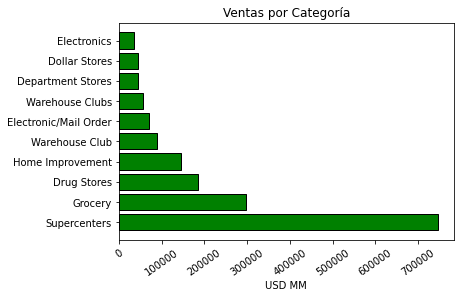

In [ ]:
# Si lo graficamos sería

x = category_top10.index
y = category_top10
plt.barh(x,y, color='green', edgecolor='black')
plt.xticks(rotation=35)
plt.title('Ventas por Categoría')
plt.xlabel('USD MM')
plt.show()

Podemos cincluir que la categoría con más ventas es la de Supermercados (Supercenters) superando los USD 700.000 MM en ventas.

### 8. ¿Cuás es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
# Creamos una nueva columna para calcular la relación
retailers['Sales/Store Ratio'] = retailers.Sales / retailers.Stores
sales_ratio = retailers.sort_values('Sales/Store Ratio', ascending=0).head(10)
sales_ratio = sales_ratio.round(2)
sales_ratio

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Store Ratio
2,Costco,90048,495.0,187.80,0.07,Warehouse Club,181.92
0,Walmart US,658119,4574.0,65.65,0.01,Supercenters,143.88
10,Sam's Club,56828,655.0,87.29,0.01,Warehouse Clubs,86.76
24,Meijer,16592,231.0,74.74,0.08,Supercenters,71.83
21,HEB,21384,323.0,66.82,0.02,Grocery,66.20
3,Home Depot,83976,1965.0,42.74,0.00,Home Improvement,42.74
7,Target,71208,1772.0,39.98,-0.01,Supercenters,40.19
15,Ahold,26903,794.0,34.45,0.03,Grocery,33.88
8,Lowe's,60311,1828.0,33.31,0.02,Home Improvement,32.99
16,Macy's,26028,889.0,30.44,0.08,Department Stores,29.28


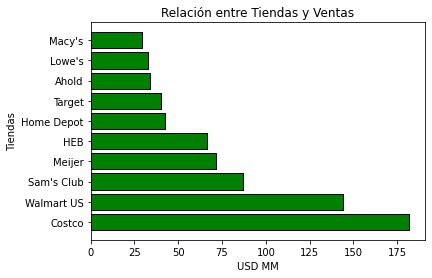

In [ ]:
# Graficamos
x = sales_ratio['Company']
y = sales_ratio['Sales/Store Ratio']

plt.barh(x,y, color='green', edgecolor='black')
plt.xticks()
plt.title('Relación entre Tiendas y Ventas')
plt.xlabel('USD MM')
plt.ylabel('Tiendas')
plt.show()

Observamos que en cuestión a la relación la empresa Costco genera más ventas que el resto, con una cantidad aproximada de USD 182.92 MM

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
# Hacemos un filtro de las tiendas online

web_stores = retailers[retailers.Stores.isnull()]
web_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Store Ratio
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order,NaN
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculamos el promedio de ventas de las web stores

web_stores['Sales'].mean()

54675.5

In [ ]:
# Analizamos las tiendas físicas

physic_stores = retailers[retailers.Stores.notnull()]
physic_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,Sales/Store Ratio
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters,143.882597
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery,29.264055
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club,181.915152
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement,42.735878
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores,9.863034
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores,7.927443
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters,40.185102
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement,32.992888
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery,24.432072
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs,86.760305


In [ ]:
# Calculamos el promedio de ventas de las tiendas físicas

physic_stores['Sales'].mean()

72488.08695652174

EL paso siguiente será encontrar el pronedio pero sin WalmartUS, ya que sabemos que teine un valor de ventas por ecnima de la media. Debemos tener en cuenta la formación de éste outlier.

In [ ]:
other_physic_stores = other_ret[other_ret.Stores.notnull()]
other_physic_stores

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs
12,Best Buy,34980,1389.0,24.685956,-0.038754,Electronics


In [ ]:
other_physic_stores['Sales'].mean()

45868.5

Observamos que al no incluir a WalmartUS las tiendas en línea tienen mayores ventas que las tiendas físicas. Ésto se debe a que WalmartUS en comparacion a las demás compañías es un valor muy atípico

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fd143617-9a29-40a1-8251-f2b24adae691' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>